<a href="https://colab.research.google.com/github/sarojkhanal-git/CBEAS-Project-Preprocessing/blob/Very_New_Codes/MNI_Files_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import shutil
import nibabel as nib

In [9]:
images = sorted(glob('/content/drive/MyDrive/MNI-HISUUB25/**/*t1w_hires_defaced_MNI.nii.gz'))
len(images)

25

In [15]:
L_labels = sorted(glob('/content/drive/MyDrive/MNI-HISUUB25/**/*hippolabels_hres_L_MNI.nii.gz'))
R_labels = sorted(glob('/content/drive/MyDrive/MNI-HISUUB25/**/*hippolabels_hres_R_MNI.nii.gz'))
len(L_labels), len(R_labels)

(25, 25)

In [ ]:
L_labels[0], R_labels[0]

('/content/drive/MyDrive/MNI-HISUUB25/s01/s01_hippolabels_hres_L_MNI.nii.gz',
 '/content/drive/MyDrive/MNI-HISUUB25/s01/s01_hippolabels_hres_R_MNI.nii.gz')

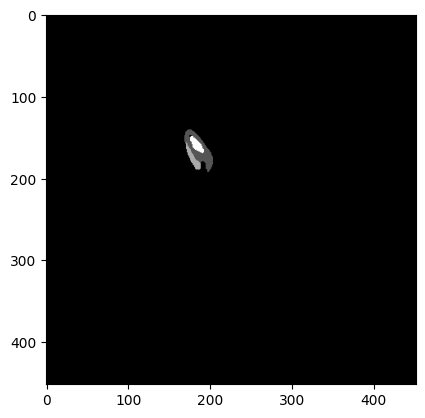

In [ ]:
plt.imshow(nib.load(L_labels[0]).get_fdata()[:, 221, :], cmap = 'gray')

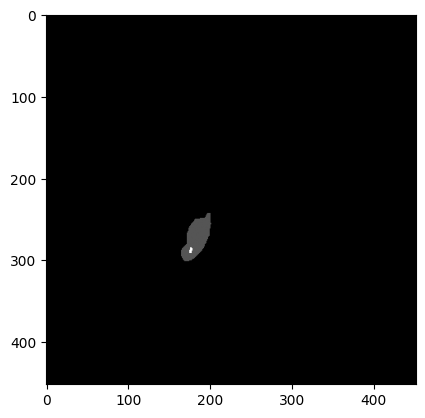

In [ ]:
plt.imshow(nib.load(R_labels[0]).get_fdata()[:, 221, :], cmap = 'gray')

In [ ]:
np.unique(nib.load(R_labels[0]).get_fdata())

array([0., 1., 2., 3.])

In [3]:
des_lbl = '/content/drive/MyDrive/MNI_train_data/Hires/label_files_combined'
os.makedirs(des_lbl, exist_ok=True)

In [ ]:
#Combining two labels
for f, g in zip(L_labels, R_labels):
  l_lbl = nib.load(f).get_fdata()
  r_lbl = nib.load(g).get_fdata()
  l_lbl[r_lbl==1] = 1
  l_lbl[r_lbl==2] = 1
  l_lbl[r_lbl==3] = 1
  l_lbl[l_lbl==2] = 1
  l_lbl[l_lbl==3] = 1
  nib.save(nib.Nifti1Image(l_lbl, nib.load(f).affine), os.path.join(des_lbl, os.path.basename(f)))
  print(f"Saved {os.path.basename(f)}")

Saved s01_hippolabels_hres_L_MNI.nii.gz
Saved s02_hippolabels_hres_L_MNI.nii.gz
Saved s03_hippolabels_hres_L_MNI.nii.gz
Saved s04_hippolabels_hres_L_MNI.nii.gz
Saved s05_hippolabels_hres_L_MNI.nii.gz
Saved s06_hippolabels_hres_L_MNI.nii.gz
Saved s07_hippolabels_hres_L_MNI.nii.gz
Saved s08_hippolabels_hres_L_MNI.nii.gz
Saved s09_hippolabels_hres_L_MNI.nii.gz
Saved s10_hippolabels_hres_L_MNI.nii.gz
Saved s11_hippolabels_hres_L_MNI.nii.gz
Saved s12_hippolabels_hres_L_MNI.nii.gz
Saved s13_hippolabels_hres_L_MNI.nii.gz
Saved s14_hippolabels_hres_L_MNI.nii.gz
Saved s15_hippolabels_hres_L_MNI.nii.gz
Saved s16_hippolabels_hres_L_MNI.nii.gz
Saved s17_hippolabels_hres_L_MNI.nii.gz
Saved s18_hippolabels_hres_L_MNI.nii.gz
Saved s19_hippolabels_hres_L_MNI.nii.gz
Saved s20_hippolabels_hres_L_MNI.nii.gz
Saved s21_hippolabels_hres_L_MNI.nii.gz
Saved s22_hippolabels_hres_L_MNI.nii.gz
Saved s23_hippolabels_hres_L_MNI.nii.gz
Saved s24_hippolabels_hres_L_MNI.nii.gz
Saved s25_hippolabels_hres_L_MNI.nii.gz


In [4]:
comb_lbl = sorted(glob('/content/drive/MyDrive/MNI_train_data/Hires/label_files_combined/*'))
len(comb_lbl)

25

In [ ]:
comb_lbl_img = nib.load(comb_lbl[0]).get_fdata()
comb_lbl_img.shape

(452, 542, 452)

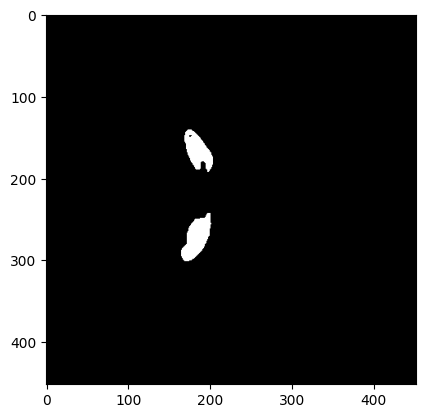

In [8]:
plt.imshow(nib.load(comb_lbl[0]).get_fdata()[:, 221, :], cmap = 'gray')

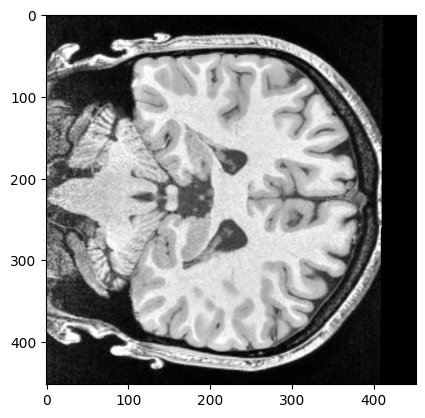

In [14]:
plt.imshow(nib.load(images[0]).get_fdata()[:, 221, :], cmap = 'gray')

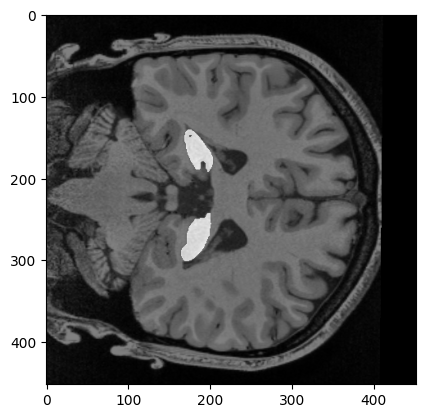

In [13]:

plt.imshow(nib.load(comb_lbl[0]).get_fdata()[:, 221, :], cmap = 'gray', alpha = 0.5)

In [ ]:
des_img = '/content/drive/MyDrive/MNI_train_data/Hires/image_files'
os.makedirs(des_img, exist_ok=True)

In [ ]:
for f in images:
  shutil.copy(f, des_img)
  print(f"Copied {os.path.basename(f)}")

Copied s01_t1w_hires_defaced_MNI.nii.gz
Copied s02_t1w_hires_defaced_MNI.nii.gz
Copied s03_t1w_hires_defaced_MNI.nii.gz
Copied s04_t1w_hires_defaced_MNI.nii.gz
Copied s05_t1w_hires_defaced_MNI.nii.gz
Copied s06_t1w_hires_defaced_MNI.nii.gz
Copied s07_t1w_hires_defaced_MNI.nii.gz
Copied s08_t1w_hires_defaced_MNI.nii.gz
Copied s09_t1w_hires_defaced_MNI.nii.gz
Copied s10_t1w_hires_defaced_MNI.nii.gz
Copied s11_t1w_hires_defaced_MNI.nii.gz
Copied s12_t1w_hires_defaced_MNI.nii.gz
Copied s13_t1w_hires_defaced_MNI.nii.gz
Copied s14_t1w_hires_defaced_MNI.nii.gz
Copied s15_t1w_hires_defaced_MNI.nii.gz
Copied s16_t1w_hires_defaced_MNI.nii.gz
Copied s17_t1w_hires_defaced_MNI.nii.gz
Copied s18_t1w_hires_defaced_MNI.nii.gz
Copied s19_t1w_hires_defaced_MNI.nii.gz
Copied s20_t1w_hires_defaced_MNI.nii.gz
Copied s21_t1w_hires_defaced_MNI.nii.gz
Copied s22_t1w_hires_defaced_MNI.nii.gz
Copied s23_t1w_hires_defaced_MNI.nii.gz
Copied s24_t1w_hires_defaced_MNI.nii.gz
Copied s25_t1w_hires_defaced_MNI.nii.gz


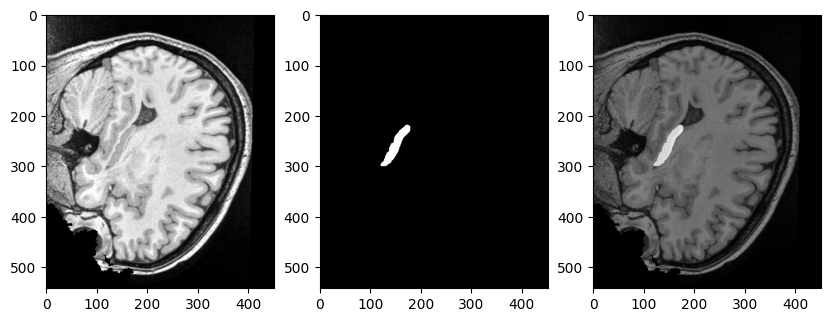

In [ ]:
fig ,ax = plt.subplots(1, 3, figsize = (10, 5))

ax[0].imshow(nib.load(images[0]).get_fdata()[300, :, :], cmap = 'gray')
ax[1].imshow(nib.load(comb_lbl[0]).get_fdata()[300, :, :], cmap = 'gray')

ax[2].imshow(nib.load(images[0]).get_fdata()[300, :, :], cmap = 'gray')
ax[2].imshow(nib.load(comb_lbl[0]).get_fdata()[300, :, :], cmap = 'gray', alpha = 0.5)